<a href="https://colab.research.google.com/github/haydenclose/Cloud_based_Oil_Detection/blob/main/UserInterface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloud Based Analysis of Oil Spills from Wrecks
This is a workflow on how to use Google Earth Engine (GEE) with Google Colab to identify and detect oil from shipwreck

Created By Hayden Close


#1 Installation and set-up of workspace

## 1.1 Connect to google drive
First of all connect your google drive account with colab so you can store inputs such as wreck locations and even scripts with functions in.

In [1]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


##1.2 Download functions file

If you havent already, download the python file with all the functions to run the tools.
The below codes downloads the file with from GitHib with the latest updates. See the script for documentation of the various functions.


In [123]:
!wget https://raw.githubusercontent.com/haydenclose/Cloud_based_Oil_Detection/main/Cloud_Based_Oil_Tools.ipynb
%run '/content/Cloud_Based_Oil_Tools.ipynb'

--2023-08-11 18:34:02--  https://raw.githubusercontent.com/haydenclose/Cloud_based_Oil_Detection/main/Cloud_Based_Oil_Tools.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96228 (94K) [text/plain]
Saving to: ‘Cloud_Based_Oil_Tools.ipynb’

Cloud_Based_Oil_Too 100%[===================>]  93.97K  --.-KB/s    in 0.008s  

2023-08-11 18:34:02 (12.1 MB/s) - ‘Cloud_Based_Oil_Tools.ipynb’ saved [96228/96228]



##1.3 Install and import required libraries
Google Colab has lots of packages aready installed but some need to be installed via `!pip install name` and
`import name`

use `> /dev/null 2>&1; ` to supress outputs as lengthy and clog up the screen.



In [3]:
!pip install geemap > /dev/null 2>&1;                                                               # Need to install geeMap for easy iteractive plotting
!pip install geopandas > /dev/null 2>&1;                                                            # Install geopandas
!pip install plotly > /dev/null 2>&1;                                                               # Install Ploty for interactive graphs
import ee                                                                                           # To access the earth engine catalogue
import geemap                                                                                       # Imports the geeMap package into environment
import geopandas                                                                                    # Makes working with geospatial data in python easier
import pandas as pd                                                                                 # Useful package to read/export csv's etc...
import ipyleaflet                                                                                   # Needed for interactive plotting
import ipywidgets as widgets                                                                        # Way to have widgets onto geemaps
import math                                                                                         # Used in the gammafilter function
import plotly.express as px                                                                         # Used to plot the spills over time or the values from a line
print('Libraries installed')


Libraries installed


##1.4 Autenticate Earth Engine servers
To access the imagery catalogues you are required to autenticate yourself via your google account. To do this run the `ee.Authenticate` function to authenticate your access to Earth Engine servers and `ee.Initialize` to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. Follow the instructions printed to the cell. Authorisation last a week but sometimes need doing again if refreshed.

In [4]:
# Trigger the authentication flow.. Only need to do once a week
ee.Authenticate()

# Initialize the library
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=KL7y2J1xSi8kf5DHYWiu_vowqy2dYSFWLL3kzUzsQJY&tc=9mRWSoNfS5bdFB6K5pg1hRzZPbb1J4IDWuzu8AWSFvA&cc=ubOyBngja4gBafqMsGkPU9MZAukcWeRpz8WNBdxS4Us

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BVos2245TW01Iy75FxyZDNPItYbQdsJ7PdhFPsg5exgvMiqaGxYh94

Successfully saved authorization token.


# 2 Set up mapping parameters
Run the below `SetUp()` to generate the options to tailor the mapping.

1.   Drop down of pre-dertermined wrecks from an CSV that should be uploaded to your google drive.
2.   Select the start date, either type it or click the calendar icon to select the date.
3.   Select the end date, either type it or click the calendar icon to select the date.
4.   Click the satellites that you wish to use.
      *   SENTINEL-1 - Only uses this satellite in the tool that uses Synthetic-aperture radar (SAR) that is not affected by cloud cover.
      *   SENTINEL-2 - Only uses visibile light with multispectral sensors but cannot see through clouds.
      *   BOTH - Uses both satellites in the tool.

5.   Select the orbit pass of the SENTINEL-1 satallite whether you want to use ascending, descending or both.

6.   Select the maximum cloud percentage. Unless lots of cloud, 100% recommend as the area of interest may not actually be covered.
7.   Select the pixel dilation factor, expands the selected pixels from the threshold by this number
8.   Removes objects that have a total number of pixels smaller than this number.















In [6]:
SetUp()

Dropdown(description='Wreck:', index=2, options=('SS DERBENT', 'HMS PRINCE OF WALES', 'HMS REPULSE', 'RFA WAR …

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

RadioButtons(description='Satellites:', index=2, options=('SENTINEL-1', 'SENTINEL-2', 'BOTH'), value='BOTH')

RadioButtons(description='Sentinel-1 Orbit Pass:', index=1, options=('ASCENDING', 'DESCENDING', 'BOTH'), value…

IntSlider(value=100, description='Max cloud%', layout=Layout(width='400px'))

IntSlider(value=3, description='Dilation factor', layout=Layout(width='400px'), max=30)

IntSlider(value=250, description='Pixel Filter', layout=Layout(width='400px'), max=1000)

Need to add the date. Need to figure out why the dot changing colour

In [125]:
CreateTimeLapse()

FloatSlider(value=0.25, description='Frames per Second (FPS)', layout=Layout(width='400px'), max=1.0, min=0.1,…

IntSlider(value=2700, description='Change to smaller value if get errors with resolution', layout=Layout(width…

Button(description='Run TimeLapse', style=ButtonStyle())

Total number of images: 4



#3 Run the Mapping tool

In [62]:
OilMapping()

Map(center=[3.620619000000001, 104.34518100000001], controls=(WidgetControl(options=['position', 'transparent_…

##3.2 Displaying the data
Run the below code to show the data. Here you can also add a comment for the previous image. i.e. **Commit comment** once you have gone to the next or previous image

*Note for the comment to show in the table you need to rerun the code*

In [10]:
Display_Data()

Textarea(value='', description='Comment:', placeholder='Add comment for image here')

Button(description='Commit comment', icon='check', style=ButtonStyle(), tooltip='Description')

Wreck_Name        Date   Oil_Area_m2  Low_Threshold  High_Threshold  \
0  HMS REPULSE  2015-02-27  3.371147e+06          -30.0           -23.5   
1  HMS REPULSE  2015-03-23  2.917876e+06          -30.0           -23.5   
2  HMS REPULSE  2015-04-16  1.106754e+07          -30.0           -23.5   
3  HMS REPULSE  2015-05-10  4.842743e+07          -30.0           -23.5   
4  HMS REPULSE  2015-08-10  0.000000e+00         2350.0          3000.0   
5  HMS REPULSE  2015-08-20  0.000000e+00         2350.0          3000.0   

     Satellite       Comment  
0  SENTINEL-1A  First Image?  
1  SENTINEL-1A                
2  SENTINEL-1A                
3  SENTINEL-1A                
4  Sentinel-2A                
5  Sentinel-2A

##3.2 Tool for optimising the Threshold
Draw a line on the map across the suspected oil spill then run the tool below get an interactive chart. For detailed instructions see section `3.21`

##3.21 Instructions on how to optimise the thresholding

If you are having difficulties getting the correct value for the threshold you can use the below tool.
First clear all drawing on the map by using the bin icon in the widgets on the left hand side and press clear all. 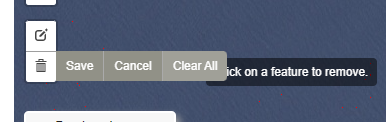

Afterwards draw a line across the expected oil leak like the image below using the line tool. Double click the last point to finish the line.

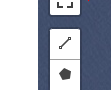

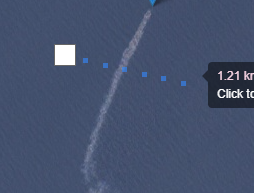

 Note the line can have multiple points and doesnt have to be straight. The graph produced is interactive and the threshold can then be determined.

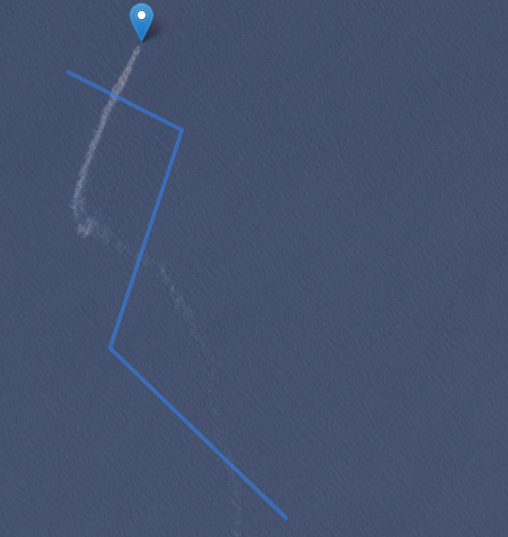



##3.2 Threshold tool
Before running, draw a small line across any potential oil features then run the tool as instructions above. The result is a plot with pixel values across this line where you can attempt to pick out a value.

In [8]:
value_detector(img)

## 3.3 Final Figure
Plots the all the polygons on an interactive map to explore

In [15]:
Plot_Polygons()

Map(center=[3.620619000000001, 104.34518100000001], controls=(WidgetControl(options=['position', 'transparent_…

## 3.4 Download polygons as shapefile

In [13]:
geemap.ee_export_vector(Oil_Polygons, filename='Oil_Polygons.shp')

Generating URL ...
Please wait ...
Data downloaded to /content/Oil_Polygons.shp


# 5 Tools in development please DONT RUN

## 5.1 Segment Anything Tool

***SUPER COMPUTATIONAL EFFORT REQUIRED. CAN BE PROGRESSED WITH PAID RESOURCES.***

link to GitHub [Segment-geospatial](https://github.com/opengeos/segment-geospatial?s=03 )

In [ ]:
%pip install segment-geospatial leafmap localtileserver > /dev/null 2>&1;
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff
import localtileserver

In [ ]:
Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                           # Load in the wreck list
Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])               # Get the latitude of selected wreck
Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                             # Get the longitude of selected wreck
geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);                                                 # Loction of chosen wreck
S2ImgCol = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED').                                         # Selects the Sentinel 1 image collection
     filterDate(str(StartDate.value), str(EndDate.value)).                                           # Selects only the dates from time period chosen above
     select(['B4', 'B3', 'B2']).
     filterBounds(geom).                                                                             # Selects only images that our wreck is contained within
     filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', max_cloud_cover.value))
S1ImgCol = (ee.ImageCollection('COPERNICUS/S1_GRD').                                               # Selects the Sentinel 1 image collection
      filterDate(str(StartDate.value), str(EndDate.value)).                                           # Selects only the dates from time period chosen above
      filterMetadata('instrumentMode', 'equals', 'IW').                                               # Selects the instrument mode that we want
      filter(ee.Filter.eq('orbitProperties_pass', str(orbit.value))).                                 # Selects the orbit path we want
      filterBounds(geom).select('VV'))
image = S1ImgCol.first();
#image = image.toUint16()  # for s2
dist = 0.05
roi = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)
geemap.ee_export_image(image, filename='Repulse.tif', scale=10, region =roi, file_per_band=True)



Generating URL ...
Please wait ...
Data downloaded to /content


In [ ]:
import io
import requests
import ee

# A Sentinel-2 surface reflectance image.
img = ee.Image('COPERNICUS/S2_SR/20210109T185751_20210109T185931_T10SEG')

# A small region within the image.
region = ee.Geometry.BBox(-122.0859, 37.0436, -122.0626, 37.0586)

# Image chunk as a NumPy structured array.
import numpy
url = img.getDownloadUrl({
    'bands': ['B3', 'B8', 'B11'],
    'region': region,
    'scale': 20,
    'format': 'NPY'
})
response = requests.get(url)
data = numpy.load(io.BytesIO(response.content))
print(data)
print(data.dtype)

# Single-band GeoTIFF files wrapped in a zip file.
url = img.getDownloadUrl({
    'name': 'single_band',
    'bands': ['B3', 'B8', 'B11'],
    'region': region
})
response = requests.get(url)
with open('single_band.zip', 'wb') as fd:
  fd.write(response.content)

[[( 266, 2504,  686) ( 298, 2676,  682) ( 228, 2017,  504) ...
  ( 162, 1290,  708) ( 467, 1362,  749) ( 180, 1396,  676)]
 [(  89, 1161,  392) (  97, 1203,  398) (  77,  982,  299) ...
  ( 119,  840,  578) ( 133,  560,  568) ( 283, 1099,  790)]
 [( 132, 1504,  363) (  15,  538,  241) (  77, 1056,  363) ...
  ( 307, 1793,  910) ( 182, 1462,  665) ( 218, 1222,  680)]
 ...
 [( 209, 2404,  744) ( 121, 1423,  575) ( 274, 1906,  571) ...
  (1726, 2418, 2847) (1278, 2501, 2414) ( 326, 1416, 1088)]
 [( 270, 2393,  760) ( 128, 1429,  440) (  78, 1043,  449) ...
  (1695, 2369, 2808) (1435, 2630, 2544) ( 384, 1586, 1310)]
 [( 128, 1485,  533) (  60,  975,  348) ( 123, 1491,  376) ...
  (1453, 2121, 2549) (1124, 2334, 2237) ( 559, 1914, 1586)]]
[('B3', '<u2'), ('B8', '<u2'), ('B11', '<u2')]


In [ ]:
import leafmap
m = leafmap.Map(center=[3.5, 104.5], zoom=7)
m.add_basemap("SATELLITE")
image = '/content/Repulse.VV.tif'
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(center=[3.5, 104.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [ ]:
my_kwargs2 = {'points_per_batch': 8,'pred_iou_thresh': 0.5,'stability_score_thresh':0.8}
my_kwargs = {'pred_iou_thresh': 0.6,'stability_score_thresh':0.8}

In [ ]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint='sam_vit_h_4b8939.pth',
    sam_kwargs=my_kwargs
)

Checkpoint /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth does not exist.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:09<00:00, 262MB/s]


In [ ]:
import cv2
image = '/content/drive/MyDrive/OilImagery.tif'
image =cv2.imread('/content/drive/MyDrive/Repulse.tif')

In [ ]:
mask = 'polygons.tif'
sam.generate('/content/drive/MyDrive/Repulse.tif', output=mask, foreground=True, unique=True)

AttributeError: ignored

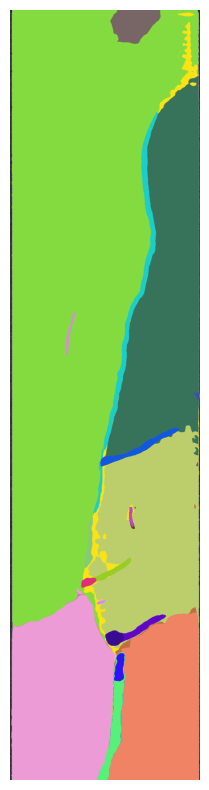

In [ ]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


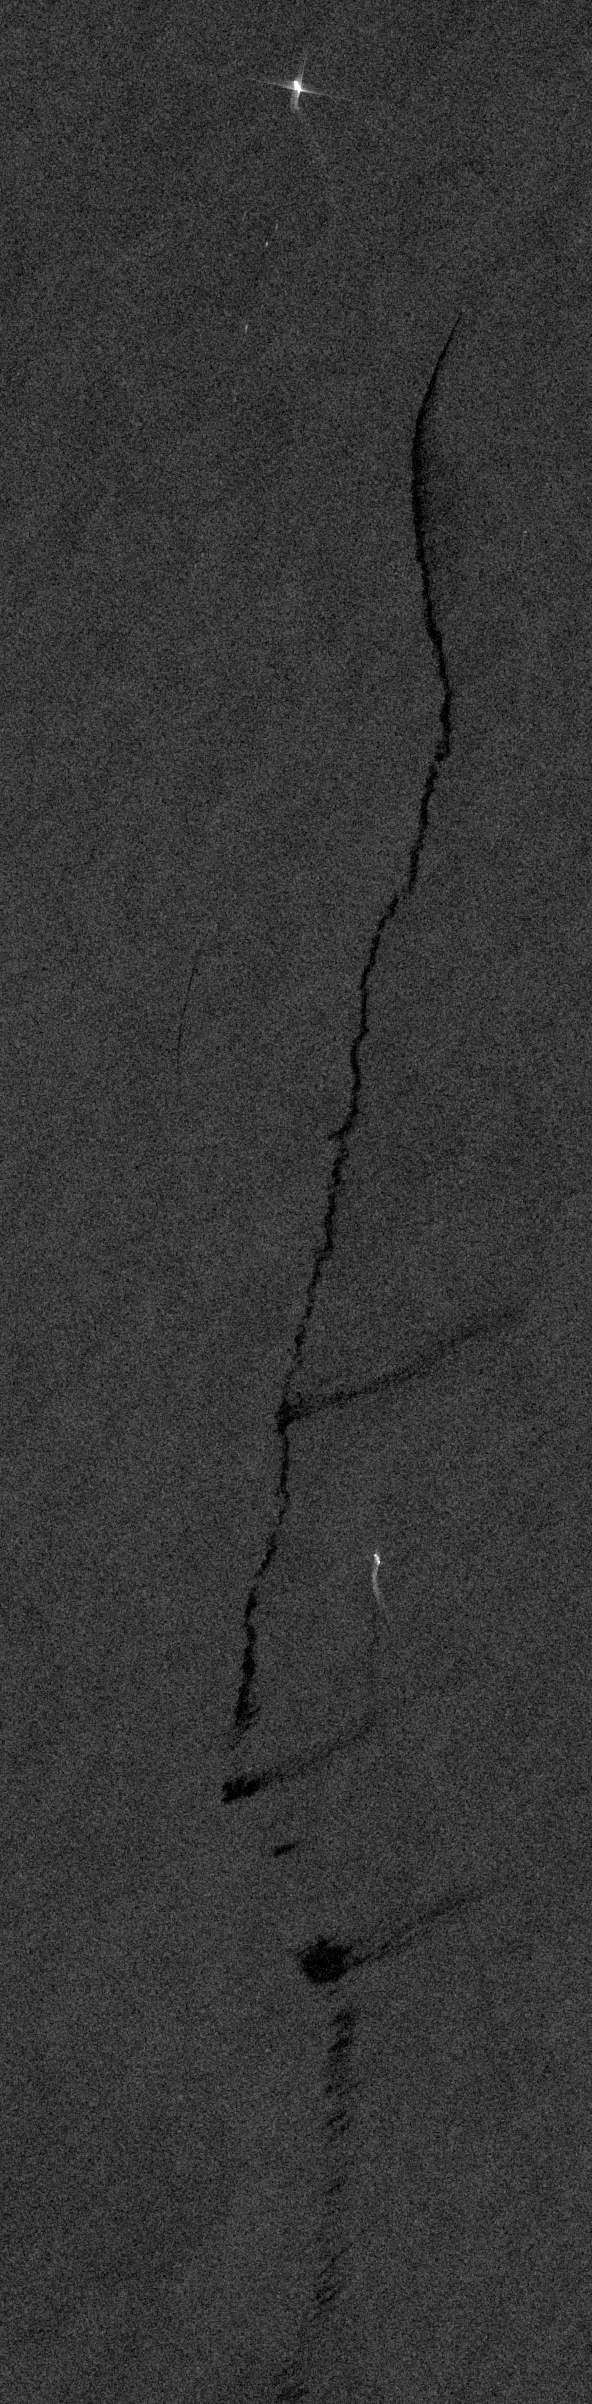
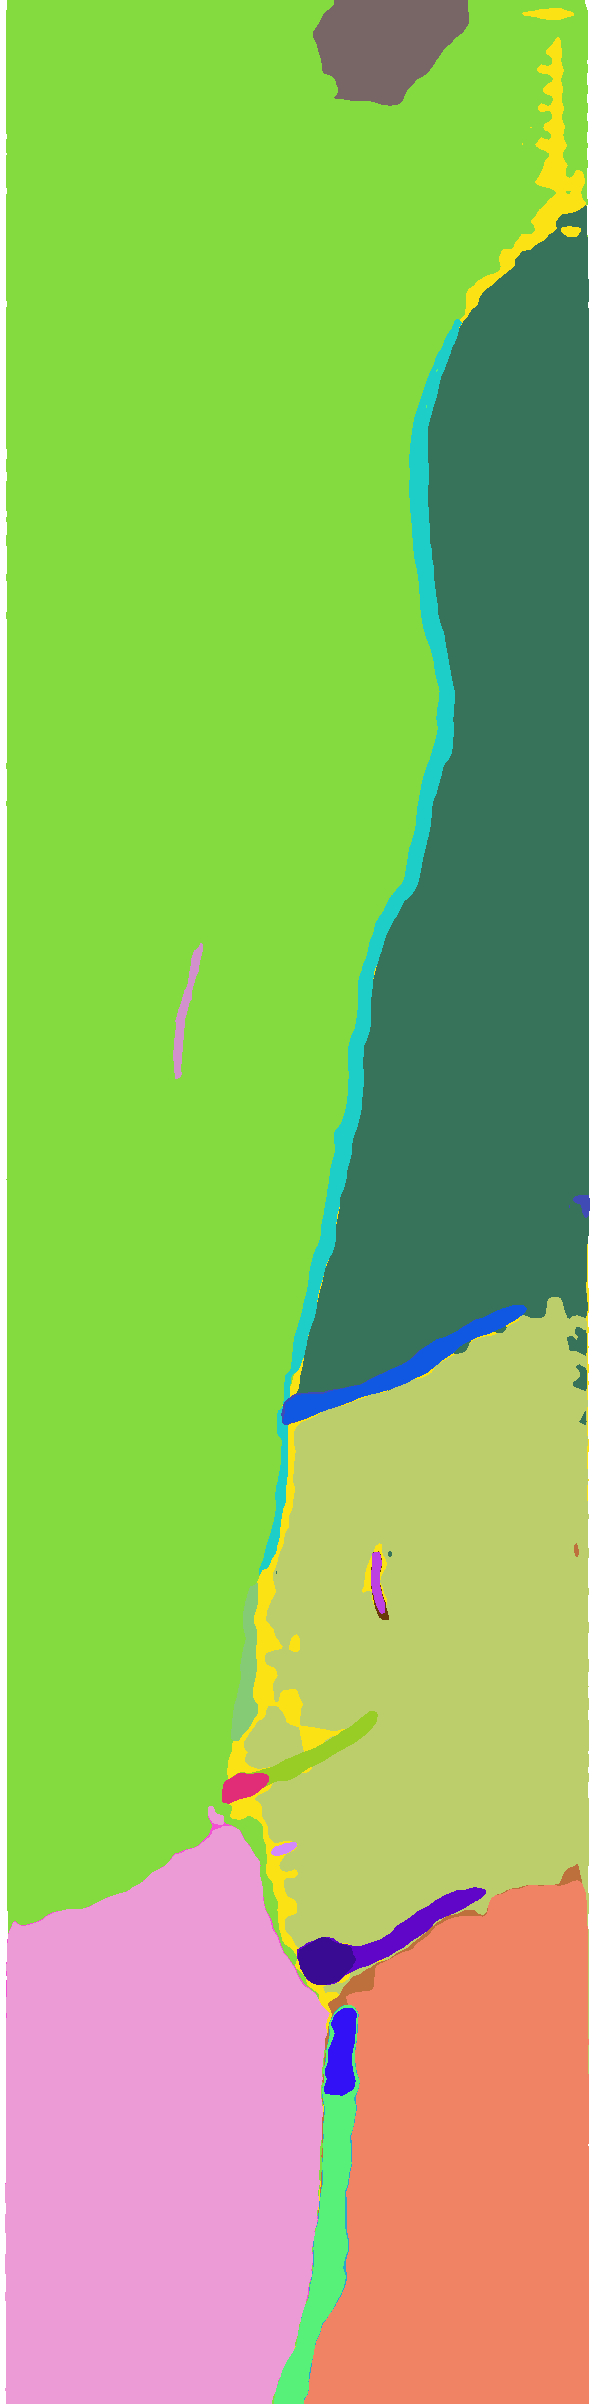

In [ ]:
leafmap.image_comparison(
    "/content/drive/MyDrive/OilImagery.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

In [ ]:
vector = "segmentsss.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

In [ ]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(vector, layer_name="Vector", style=style)
m

Map(bottom=1027770.0, center=[3.620592595321617, 104.34516974764037], controls=(ZoomControl(options=['position…

In [ ]:
!pip install pycrs > /dev/null 2>&1;
import pycrs
seg = geemap.shp_to_ee("masks_gcs.shp")
Map.addLayer(seg,{}, 'polygons')
Map

In [108]:
f"{WRKdropdown.value}.gif"

'HMS REPULSE.gif'

## 5.2 Timelapses

In [16]:
!pip install ffmpeg > /dev/null 2>&1;
import ffmpeg
from datetime import date
import datetime
import glob
import os
from dateutil.relativedelta import relativedelta
#geemap.update_package()

Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                           # Load in the wreck list
Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])               # Get the latitude of selected wreck
Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                             # Get the longitude of selected wreck
geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);

pp= 0.00005
WRKpoint = ee.Geometry.Polygon(
  [[[Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]-pp]]], None, False)
dist = 0.05
roi = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)

pp= 0.0001
WRKpointS2 = ee.Geometry.Polygon(
  [[[Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]-pp]]], None, False)
dist = 0.05
roiS2 = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)


In [ ]:
!pip install ffmpeg > /dev/null 2>&1;
import ffmpeg
from datetime import date
import datetime
import glob
import os
from dateutil.relativedelta import relativedelta
#geemap.update_package()

Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                           # Load in the wreck list
Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])               # Get the latitude of selected wreck
Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                             # Get the longitude of selected wreck
geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);

pp= 0.00005
WRKpoint = ee.Geometry.Polygon(
  [[[Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]-pp]]], None, False)
dist = 0.05
roi = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)

pp= 0.0001
WRKpointS2 = ee.Geometry.Polygon(
  [[[Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]-pp],
   [Lon.iloc[0]+pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]+pp],
   [Lon.iloc[0]-pp, Lat.iloc[0]-pp]]], None, False)
dist = 0.05
roiS2 = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)


TimelapsesReq = (EndDate.value.year-StartDate.value.year)*6

TMPstart = StartDate.value
END = EndDate.value
i = 1
for i in range(TimelapsesReq):
  try:
   if i >0: TMPstart = TMPstartnxt
   TMPend = TMPstart + relativedelta(months=+2)
   if TMPend > END: TMPend =  END
   TMPstartnxt = TMPend
   if SatelliteNo.value == 'SENTINEL-1' or SatelliteNo.value == 'BOTH':
     timelapse = geemap.sentinel1_timelapse(
       roi,
       out_gif  = f'sentinel1{i}.gif',
       start_year=TMPstart.year,
       end_year=TMPend.year,
       start_date=f'{TMPstart.month}-{TMPstart.day}',
       end_date=f'{TMPend.month}-{TMPend.day}',
       frequency='day',
       palette= "Greys_r",
       vis_params={"min": -35, "max": -5},
       frames_per_second=0.25,
       title=f'{WRKdropdown .value} Sentinel-1 Timelapse',
       add_progress_bar=False,
       overlay_data=WRKpoint,
       overlay_color='red',
       overlay_width=10,
       loop = 1,
       mp4=False,
       dimensions =3000,
       font_color = 'black')
  except:
   pass
TMPstart = StartDate.value
END = EndDate.value
for i in range(TimelapsesReq):
   if i >0: TMPstart = TMPstartnxt
   TMPend = TMPstart + relativedelta(months=+2)
   if TMPend > END: TMPend =  END
   TMPstartnxt = TMPend
   if SatelliteNo.value == 'SENTINEL-2' or SatelliteNo.value == 'BOTH':

     try: timelapse = geemap.sentinel2_timelapse(
            roiS2,
            out_gif=f'sentinel2{i}.gif',
            start_year=TMPstart.year,
            end_year=TMPend.year,
            start_date=f'{TMPstart.month}-{TMPstart.day}',
            end_date=f'{TMPend.month}-{TMPend.day}',
            frequency='day',
            bands=['Red', 'Green', 'Blue'],
            frames_per_second=0.5,
            loop = 1,
            title=f'{WRKdropdown.value} Sentinel-2 Timelapse',
            add_progress_bar=False,
            overlay_data=WRKpointS2,
            overlay_width=10,
            overlay_color='red',
            font_color = 'red',
            cloud_pct= 100,
            dimensions = 3000,
            apply_fmask=False)
     except:
       pass

import imageio.v3 as iio
import numpy as np
for filenames in glob.glob(os.path.join('/content/', '*tmp*')):
    os.remove(filenames)
folder_path = '/content/drive/MyDrive/timelapses/'
filenames = glob.glob(os.path.join('/content/', 'sentinel1*'))
filenames = sorted(filenames, key=os.path.getmtime)
arrays = [iio.imread(filename) for filename in filenames]
try:
   stacked_array = np.vstack(arrays)
   iio.imwrite(f'{WRKdropdown.value} Sentinel-1 Timelapse.gif', stacked_array, duration=1000)
except:
   print('not enough images from sentinel-1 try adjusting timeframe')
   pass

for filenames in glob.glob(os.path.join('/content/', 'sentinel1*')):
    os.remove(filenames)
filenames = glob.glob(os.path.join('/content/', 'sentinel2*'))
filenames = sorted(filenames, key=os.path.getmtime)
arrays = [iio.imread(filename) for filename in filenames]
try:
   stacked_array = np.vstack(arrays)
   iio.imwrite(f'{WRKdropdown.value} Sentinel-2 Timelapse2.gif', stacked_array, duration=1000)
except:
   print('not enough images from sentinel-2 try adjusting timeframe')
   pass
for filenames in glob.glob(os.path.join('/content/', 'sentinel2*')):
    os.remove(filenames)

Total number of images: 12



In [71]:
roi = ee.Geometry.BBox(104.295181, 3.570619,104.395181, 3.670619)
timelapse = geemap.sentinel2_timelapse(
            roiS2,
            out_gif='sentinelNative.gif',
            start_year=2016,
            end_year=2016,
            start_date='02-01',
            end_date='03-30',
            frequency='day',
            bands=['Red', 'Green', 'Blue'],
            frames_per_second=0.25,
            loop = 1,
            title=f'{WRKdropdown.value} Sentinel-2 Timelapse',
            add_progress_bar=False,
            overlay_data=WRKpointS2,
            overlay_color='red',
            overlay_width=10,
            font_color = 'red',
            cloud_pct= 100,
            dimensions = 2500,
            apply_fmask = False)


Total number of images: 2

module 'ffmpeg' has no attribute 'input'


## **Here**

Doing timelapsey stuff


In [95]:
import os
import requests
from typing import Union, List
from PIL import Image
import io
import glob
from PIL import Image, ImageDraw

In [105]:
Oil_Polygons = ee.FeatureCollection([])                                                             # Need an empty FeatureCollection to Append our polygons to, add here so resets
Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                            # Load in the wreck list
Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])                # Get the latitude of selected wreck
Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                              # Get the longitude of selected wreck
geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);                                                  # Loction of chosen wreck

sat = 'S2'

S2ImgCol = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED').                                         # Selects the Sentinel 2 image collection
     filterDate('2016-01-17','2016-03-30').                                                         # Selects only the dates from time period chosen above
     filterBounds(geom))                                                                            # Filter by area
S2ImgCol                                                                                            # Prints the image collection

In [106]:
out_gif = os.path.abspath('sentinelNative.gif')
out_dir = os.path.dirname(out_gif)

if not os.path.exists(out_dir):
        os.makedirs(out_dir)
dimensions = 2750
count = S2ImgCol.size().getInfo()
basename = os.path.basename(out_gif)[:-4]
names = [os.path.join( out_dir, f"{basename}_{str(i+1).zfill(int(len(str(count))))}.jpg")
         for i in range(count)]
get_image_collection_thumbnails(
  S2ImgCol,
  out_dir,
  vis_params={
     "min": 0,
     "max": 3000,
     "bands": ["B4", "B3", "B2"],},
  dimensions=dimensions,
  names=names,
)

Total number of images: 6



In [107]:

for filename in glob.glob(os.path.join('/content/', '*.jpg')):
# Open the image
  image = Image.open(filename)

  # Create an ImageDraw object
  draw = ImageDraw.Draw(image)

  # Get the dimensions of the image
  width, height = image.size

  # Calculate the coordinates of the center of the image
  x, y = width // 2, height // 2

  # Draw a red dot at the center of the image
  draw.ellipse((x - 10, y - 10, x + 10, y + 10), fill='red')

  # Save the annotated image
  image.save(filename)


In [109]:
make_gif(names,
         out_gif,
         fps=0.5,
         loop=0,
         mp4=False,
         clean_up=True)


NameError: ignored

In [65]:
if os.path.exists(out_gif):
  add_text_to_gif(
                    out_gif,
                    out_gif,
                    xy=(10,10),
                    text_sequence=f'{WRKdropdown.value} Sentinel-2 Timelapse',
                    font_color='red',
                    add_progress_bar=True,
                    progress_bar_color='green',
                    duration=1000 / 0.5,
                    loop=0)

In [42]:
def check_color(in_color):
    """Checks the input color and returns the corresponding hex color code.

    Args:
        in_color (str or tuple): It can be a string (e.g., 'red', '#ffff00', 'ffff00', 'ff0') or RGB tuple (e.g., (255, 127, 0)).

    Returns:
        str: A hex color code.
    """
    import colour

    out_color = "#000000"  # default black color
    if isinstance(in_color, tuple) and len(in_color) == 3:
        # rescale color if necessary
        if all(isinstance(item, int) for item in in_color):
            in_color = [c / 255.0 for c in in_color]

        return colour.Color(rgb=tuple(in_color)).hex_l

    else:
        # try to guess the color system
        try:
            return colour.Color(in_color).hex_l

        except Exception as e:
            pass

        # try again by adding an extra # (GEE handle hex codes without #)
        try:
            return colour.Color(f"#{in_color}").hex_l

        except Exception as e:
            print(
                f"The provided color ({in_color}) is invalid. Using the default black color."
            )
            print(e)

        return out_color

def add_text_to_gif(
    in_gif,
    out_gif,
    xy=None,
    text_sequence=None,
    font_type="arial.ttf",
    font_size=100,
    font_color="#000000",
    add_progress_bar=True,
    progress_bar_color="green",
    progress_bar_height=15,
    duration=100,
    loop=0,
):
    """Adds animated text to a GIF image.

    Args:
        in_gif (str): The file path to the input GIF image.
        out_gif (str): The file path to the output GIF image.
        xy (tuple, optional): Top left corner of the text. It can be formatted like this: (10, 10) or ('15%', '25%'). Defaults to None.
        text_sequence (int, str, list, optional): Text to be drawn. It can be an integer number, a string, or a list of strings. Defaults to None.
        font_type (str, optional): Font type. Defaults to "arial.ttf".
        font_size (int, optional): Font size. Defaults to 20.
        font_color (str, optional): Font color. It can be a string (e.g., 'red'), rgb tuple (e.g., (255, 127, 0)), or hex code (e.g., '#ff00ff').  Defaults to '#000000'.
        add_progress_bar (bool, optional): Whether to add a progress bar at the bottom of the GIF. Defaults to True.
        progress_bar_color (str, optional): Color for the progress bar. Defaults to 'white'.
        progress_bar_height (int, optional): Height of the progress bar. Defaults to 5.
        duration (int, optional): controls how long each frame will be displayed for, in milliseconds. It is the inverse of the frame rate. Setting it to 100 milliseconds gives 10 frames per second. You can decrease the duration to give a smoother animation.. Defaults to 100.
        loop (int, optional): controls how many times the animation repeats. The default, 1, means that the animation will play once and then stop (displaying the last frame). A value of 0 means that the animation will repeat forever. Defaults to 0.

    """
    # import io
    import warnings

    import pkg_resources
    from PIL import Image, ImageDraw, ImageFont, ImageSequence

    warnings.simplefilter("ignore")
    pkg_dir = os.path.dirname(pkg_resources.resource_filename("geemap", "geemap.py"))
    default_font = os.path.join(pkg_dir, "data/fonts/arial.ttf")

    in_gif = os.path.abspath(in_gif)
    out_gif = os.path.abspath(out_gif)

    if not os.path.exists(in_gif):
        print("The input gif file does not exist.")
        return

    if not os.path.exists(os.path.dirname(out_gif)):
        os.makedirs(os.path.dirname(out_gif))

    if font_type == "arial.ttf":
        font = ImageFont.truetype(default_font, font_size)
    elif font_type == "alibaba.otf":
        default_font = os.path.join(pkg_dir, "data/fonts/alibaba.otf")
        font = ImageFont.truetype(default_font, font_size)
    else:
        try:
            font_list = system_fonts(show_full_path=True)
            font_names = [os.path.basename(f) for f in font_list]
            if (font_type in font_list) or (font_type in font_names):
                font = ImageFont.truetype(font_type, font_size)
            else:
                print(
                    "The specified font type could not be found on your system. Using the default font instead."
                )
                font = ImageFont.truetype(default_font, font_size)
        except Exception as e:
            print(e)
            font = ImageFont.truetype(default_font, font_size)

    color = check_color(font_color)
    progress_bar_color = check_color(progress_bar_color)

    try:
        image = Image.open(in_gif)
    except Exception as e:
        print("An error occurred while opening the gif.")
        print(e)
        return

    count = image.n_frames
    W, H = image.size
    progress_bar_widths = [i * 1.0 / count * W for i in range(1, count + 1)]
    progress_bar_shapes = [
        [(0, H - progress_bar_height), (x, H)] for x in progress_bar_widths
    ]

    if xy is None:
        # default text location is 5% width and 5% height of the image.
        xy = (int(0.05 * W), int(0.05 * H))
    elif (xy is not None) and (not isinstance(xy, tuple)) and (len(xy) == 2):
        print("xy must be a tuple, e.g., (10, 10), ('10%', '10%')")
        return
    elif all(isinstance(item, int) for item in xy) and (len(xy) == 2):
        x, y = xy
        if (x > 0) and (x < W) and (y > 0) and (y < H):
            pass
        else:
            print(
                f"xy is out of bounds. x must be within [0, {W}], and y must be within [0, {H}]"
            )
            return
    elif all(isinstance(item, str) for item in xy) and (len(xy) == 2):
        x, y = xy
        if ("%" in x) and ("%" in y):
            try:
                x = int(float(x.replace("%", "")) / 100.0 * W)
                y = int(float(y.replace("%", "")) / 100.0 * H)
                xy = (x, y)
            except Exception:
                raise Exception(
                    "The specified xy is invalid. It must be formatted like this ('10%', '10%')"
                )
    else:
        print(
            "The specified xy is invalid. It must be formatted like this: (10, 10) or ('10%', '10%')"
        )
        return

    if text_sequence is None:
        text = [str(x) for x in range(1, count + 1)]
    elif isinstance(text_sequence, int):
        text = [str(x) for x in range(text_sequence, text_sequence + count + 1)]
    elif isinstance(text_sequence, str):
        try:
            text_sequence = int(text_sequence)
            text = [str(x) for x in range(text_sequence, text_sequence + count + 1)]
        except Exception:
            text = [text_sequence] * count
    elif isinstance(text_sequence, list) and len(text_sequence) != count:
        print(
            f"The length of the text sequence must be equal to the number ({count}) of frames in the gif."
        )
        return
    else:
        text = [str(x) for x in text_sequence]

    try:
        frames = []
        # Loop over each frame in the animated image
        for index, frame in enumerate(ImageSequence.Iterator(image)):
            # Draw the text on the frame
            frame = frame.convert("RGB")
            draw = ImageDraw.Draw(frame)
            # w, h = draw.textsize(text[index])
            draw.text(xy, text[index], font=font, fill=color)
            if add_progress_bar:
                draw.rectangle(progress_bar_shapes[index], fill=progress_bar_color)
            del draw

            b = io.BytesIO()
            frame.save(b, format="GIF")
            frame = Image.open(b)

            frames.append(frame)
        # https://www.pythoninformer.com/python-libraries/pillow/creating-animated-gif/
        # Save the frames as a new image

        frames[0].save(
            out_gif,
            save_all=True,
            append_images=frames[1:],
            duration=duration,
            loop=loop,
            optimize=True,
        )
    except Exception as e:
        print(e)


In [104]:
def get_image_thumbnail(
    ee_object,
    out_img,
    vis_params,
    dimensions=500,
    region=None,
    format="jpg",
    crs="EPSG:3857",
    timeout=300,
    proxies=None,
):
    """Download a thumbnail for an ee.Image.

    Args:
        ee_object (object): The ee.Image instance.
        out_img (str): The output file path to the png thumbnail.
        vis_params (dict): The visualization parameters.
        dimensions (int, optional):(a number or pair of numbers in format WIDTHxHEIGHT) Maximum dimensions of the thumbnail to render, in pixels. If only one number is passed, it is used as the maximum, and the other dimension is computed by proportional scaling. Defaults to 500.
        region (object, optional): Geospatial region of the image to render, it may be an ee.Geometry, GeoJSON, or an array of lat/lon points (E,S,W,N). If not set the default is the bounds image. Defaults to None.
        format (str, optional): Either 'png' or 'jpg'. Default to 'jpg'.
        timeout (int, optional): The number of seconds after which the request will be terminated. Defaults to 300.
        proxies (dict, optional): A dictionary of proxy servers to use for the request. Defaults to None.
    """

    if not isinstance(ee_object, ee.Image):
        raise TypeError("The ee_object must be an ee.Image.")

    ext = os.path.splitext(out_img)[1][1:]
    if ext not in ["png", "jpg"]:
        raise ValueError("The output image format must be png or jpg.")
    else:
        format = ext

    out_image = os.path.abspath(out_img)
    out_dir = os.path.dirname(out_image)
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    if region is not None:
        vis_params["region"] = region

    vis_params["dimensions"] = dimensions
    vis_params["format"] = format
    vis_params["crs"] = crs
    url = ee_object.getThumbURL(vis_params)

    try:
        r = requests.get(url, stream=True, timeout=timeout, proxies=proxies)
    except Exception as e:
        print("An error occurred while downloading.")
        print(e)

    if r.status_code != 200:
        print("An error occurred while downloading.")
        print(r.json()["error"]["message"])

    else:
        with open(out_img, "wb") as fd:
            for chunk in r.iter_content(chunk_size=1024):
                fd.write(chunk)


def get_image_collection_thumbnails(
    ee_object,
    out_dir,
    vis_params,
    dimensions=500,
    region=None,
    format="jpg",
    names=None,
    verbose=True,
    timeout=300,
    proxies=None,
):
    """Download thumbnails for all images in an ImageCollection.

    Args:
        ee_object (object): The ee.ImageCollection instance.
        out_dir ([str): The output directory to store thumbnails.
        vis_params (dict): The visualization parameters.
        dimensions (int, optional):(a number or pair of numbers in format WIDTHxHEIGHT) Maximum dimensions of the thumbnail to render, in pixels. If only one number is passed, it is used as the maximum, and the other dimension is computed by proportional scaling. Defaults to 500.
        region (object, optional): Geospatial region of the image to render, it may be an ee.Geometry, GeoJSON, or an array of lat/lon points (E,S,W,N). If not set the default is the bounds image. Defaults to None.
        format (str, optional): Either 'png' or 'jpg'. Default to 'jpg'.
        names (list, optional): The list of output file names. Defaults to None.
        verbose (bool, optional): Whether or not to print hints. Defaults to True.
        timeout (int, optional): The number of seconds after which the request will be terminated. Defaults to 300.
        proxies (dict, optional): A dictionary of proxy servers to use for the request. Defaults to None.
    """
    if not isinstance(ee_object, ee.ImageCollection):
        print("The ee_object must be an ee.ImageCollection.")
        raise TypeError("The ee_object must be an ee.Image.")

    if format not in ["png", "jpg"]:
        raise ValueError("The output image format must be png or jpg.")

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    try:
        count = int(ee_object.size().getInfo())
        if verbose:
            print(f"Total number of images: {count}\n")

        if (names is not None) and (len(names) != count):
            print("The number of names is not equal to the number of images.")
            return

        if names is None:
            names = ee_object.aggregate_array("system:index").getInfo()

        images = ee_object.toList(count)
        ######### ADDED THIS HERE SO TO CLIP THE IMAGE AND CENTRE ON LOCATION OF INTEREST#####
        if sat == 'S1':
          dist = 0.05
          roi = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)
        else:
          dist = 0.05
          roi = ee.Geometry.BBox(Lon.iloc[0] - dist, Lat.iloc[0]- dist,Lon.iloc[0]+ dist, Lat.iloc[0] +dist)
        #######################################################################################

        for i in range(0, count):
            image = ee.Image(images.get(i)).clip(roi) ####### HLC ADDED CLIP HERE
            name = str(names[i])
            ext = os.path.splitext(name)[1][1:]
            if ext != format:
                name = name + "." + format
            out_img = os.path.join(out_dir, name)
            if verbose:
                print(f"Downloading {i+1}/{count}: {name} ...")

            get_image_thumbnail(
                image,
                out_img,
                vis_params,
                dimensions,
                region,
                format,
                timeout=timeout,
                proxies=proxies,
            )

    except Exception as e:
        print(e)

In [19]:
def make_gif(
    images: Union[List[str], str],
    out_gif: str,
    ext: str = "jpg",
    fps: int = 10,
    loop: int = 0,
    mp4: bool = False,
    clean_up: bool = False,
) -> None:
    """Creates a gif from a list of images.

    Args:
        images (list | str): The list of images or input directory to create the gif from.
        out_gif (str): File path to the output gif.
        ext (str, optional): The extension of the images. Defaults to 'jpg'.
        fps (int, optional): The frames per second of the gif. Defaults to 10.
        loop (int, optional): The number of times to loop the gif. Defaults to 0.
        mp4 (bool, optional): Whether to convert the gif to mp4. Defaults to False.

    """
    if isinstance(images, str) and os.path.isdir(images):
        images = list(glob.glob(os.path.join(images, f"*.{ext}")))
        if len(images) == 0:
            raise ValueError("No images found in the input directory.")
    elif not isinstance(images, list):
        raise ValueError("images must be a list or a path to the image directory.")

    images.sort()

    frames = [Image.open(image) for image in images]
    frame_one = frames[0]
    frame_one.save(
        out_gif,
        format="GIF",
        append_images=frames,
        save_all=True,
        duration=int(1000 / fps),
        loop=loop,
    )

    if mp4:
        if not is_tool("ffmpeg"):
            print("ffmpeg is not installed on your computer.")
            return

        if os.path.exists(out_gif):
            out_mp4 = out_gif.replace(".gif", ".mp4")
            cmd = f"ffmpeg -loglevel error -i {out_gif} -vcodec libx264 -crf 25 -pix_fmt yuv420p {out_mp4}"
            os.system(cmd)
            if not os.path.exists(out_mp4):
                raise Exception(f"Failed to create mp4 file.")
    if clean_up:
        for image in images:
            os.remove(image)


def gif_to_mp4(in_gif, out_mp4):
    """Converts a gif to mp4.

    Args:
        in_gif (str): The input gif file.
        out_mp4 (str): The output mp4 file.
    """
    from PIL import Image

    if not os.path.exists(in_gif):
        raise FileNotFoundError(f"{in_gif} does not exist.")

    out_mp4 = os.path.abspath(out_mp4)
    if not out_mp4.endswith(".mp4"):
        out_mp4 = out_mp4 + ".mp4"

    if not os.path.exists(os.path.dirname(out_mp4)):
        os.makedirs(os.path.dirname(out_mp4))

    if not is_tool("ffmpeg"):
        print("ffmpeg is not installed on your computer.")
        return

    width, height = Image.open(in_gif).size

    if width % 2 == 0 and height % 2 == 0:
        cmd = f"ffmpeg -loglevel error -i {in_gif} -vcodec libx264 -crf 25 -pix_fmt yuv420p {out_mp4}"
        os.system(cmd)
    else:
        width += width % 2
        height += height % 2
        cmd = f"ffmpeg -loglevel error -i {in_gif} -vf scale={width}:{height} -vcodec libx264 -crf 25 -pix_fmt yuv420p {out_mp4}"
        os.system(cmd)

    if not os.path.exists(out_mp4):
        raise Exception(f"Failed to create mp4 file.")

